# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sns
import missingno as msno
from plotly.offline import init_notebook_mode, iplot
import statistics
import scipy.stats as stats
from sklearn.cluster import KMeans,AgglomerativeClustering
import plotly.graph_objs as go

In [2]:
bankData = pd.read_csv("24650196.csv")

# Taking a quick look at the data

In [3]:
pd.concat([bankData.head(),bankData.tail()])

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
0,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,37,admin.,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,57,admin.,married,university.degree,no,yes,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2995,67,housemaid,divorced,professional.course,no,yes,no,cellular,nov,mon,...,2,5,5,success,-1.1,94.767,-50.8,1.039,4963.6,yes
2996,33,admin.,married,university.degree,no,no,no,cellular,nov,tue,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.035,4963.6,yes
2997,31,admin.,single,university.degree,no,yes,no,cellular,nov,thu,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.031,4963.6,yes
2998,36,admin.,married,university.degree,no,no,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
2999,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no


In [4]:
categorical_attribute = ['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome','subscribed']
numerical_attribute = ['age','duration','campaign','pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx'
                       ,'euribor3m','nr.employed']

In [5]:
for i in bankData[categorical_attribute] :
    print(bankData[i].value_counts(),'\n')

admin.           718
blue-collar      706
technician       497
services         303
management       224
retired          126
entrepreneur     101
self-employed     98
housemaid         85
unemployed        67
student           59
unknown           16
Name: job, dtype: int64 

married     1820
single       821
divorced     351
unknown        8
Name: marital, dtype: int64 

university.degree      845
high.school            665
basic.9y               472
professional.course    400
basic.4y               322
basic.6y               176
unknown                119
illiterate               1
Name: education, dtype: int64 

no         2370
unknown     630
Name: default, dtype: int64 

yes        1552
no         1354
unknown      94
Name: housing, dtype: int64 

no         2482
yes         424
unknown      94
Name: loan, dtype: int64 

cellular     1868
telephone    1132
Name: contact, dtype: int64 

may    1048
jul     530
aug     387
jun     373
nov     312
apr     210
oct      47
mar      39

<AxesSubplot:xlabel='subscribed', ylabel='Density'>

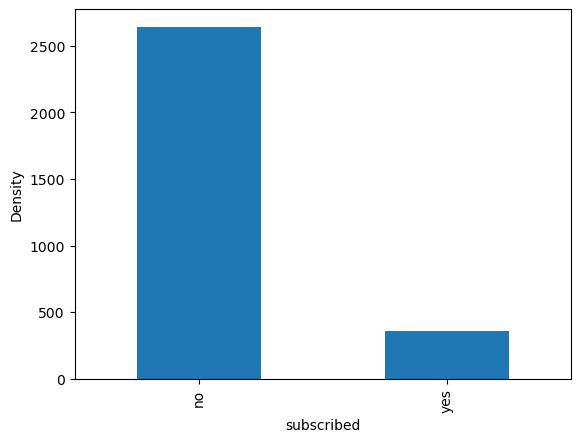

In [6]:
bankData['subscribed'].value_counts().plot(kind='bar', xlabel='subscribed', ylabel='Density')

<AxesSubplot:title={'center':'subscribed'}, ylabel='Frequency'>

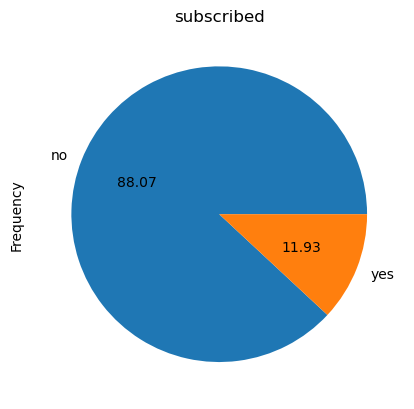

In [7]:
bankData['subscribed'].value_counts().plot(kind='pie', autopct="%.2f", title='subscribed',ylabel='Frequency')

# Finding missing data

In [8]:
bankData.dtypes
# all data are in their correct data types

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
subscribed         object
dtype: object

In [9]:
# replace all missing values with NA
bankData.replace(['unknown'], pd.NA, inplace=True)

In [10]:
bankData.sample(20)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
124,58,retired,divorced,university.degree,no,yes,no,telephone,may,fri,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2199,38,services,married,high.school,no,no,no,cellular,apr,tue,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.384,5099.1,no
504,36,blue-collar,married,basic.6y,<NA>,yes,no,telephone,may,tue,...,5,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2511,32,management,married,university.degree,no,yes,yes,cellular,may,wed,...,9,999,1,failure,-1.8,92.893,-46.2,1.281,5099.1,no
2077,33,blue-collar,divorced,basic.9y,<NA>,no,no,cellular,apr,thu,...,1,999,0,nonexistent,-1.8,93.075,-47.1,1.410,5099.1,no
999,29,admin.,married,university.degree,no,yes,no,cellular,jul,wed,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
2332,34,management,married,university.degree,<NA>,yes,no,cellular,may,thu,...,1,999,0,nonexistent,-1.8,92.893,-46.2,1.327,5099.1,no
1384,34,unemployed,married,high.school,no,no,no,cellular,jul,thu,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
1743,55,blue-collar,married,basic.9y,no,no,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,yes
2137,48,services,divorced,high.school,no,yes,no,cellular,apr,mon,...,1,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,no


In [11]:
bankData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             3000 non-null   int64  
 1   job             2984 non-null   object 
 2   marital         2992 non-null   object 
 3   education       2881 non-null   object 
 4   default         2370 non-null   object 
 5   housing         2906 non-null   object 
 6   loan            2906 non-null   object 
 7   contact         3000 non-null   object 
 8   month           3000 non-null   object 
 9   day_of_week     3000 non-null   object 
 10  duration        3000 non-null   int64  
 11  campaign        3000 non-null   int64  
 12  pdays           3000 non-null   int64  
 13  previous        3000 non-null   int64  
 14  poutcome        3000 non-null   object 
 15  emp.var.rate    3000 non-null   float64
 16  cons.price.idx  3000 non-null   float64
 17  cons.conf.idx   3000 non-null   f

In [12]:
bankData.isnull().sum()

age                 0
job                16
marital             8
education         119
default           630
housing            94
loan               94
contact             0
month               0
day_of_week         0
duration            0
campaign            0
pdays               0
previous            0
poutcome            0
emp.var.rate        0
cons.price.idx      0
cons.conf.idx       0
euribor3m           0
nr.employed         0
subscribed          0
dtype: int64

<AxesSubplot:>

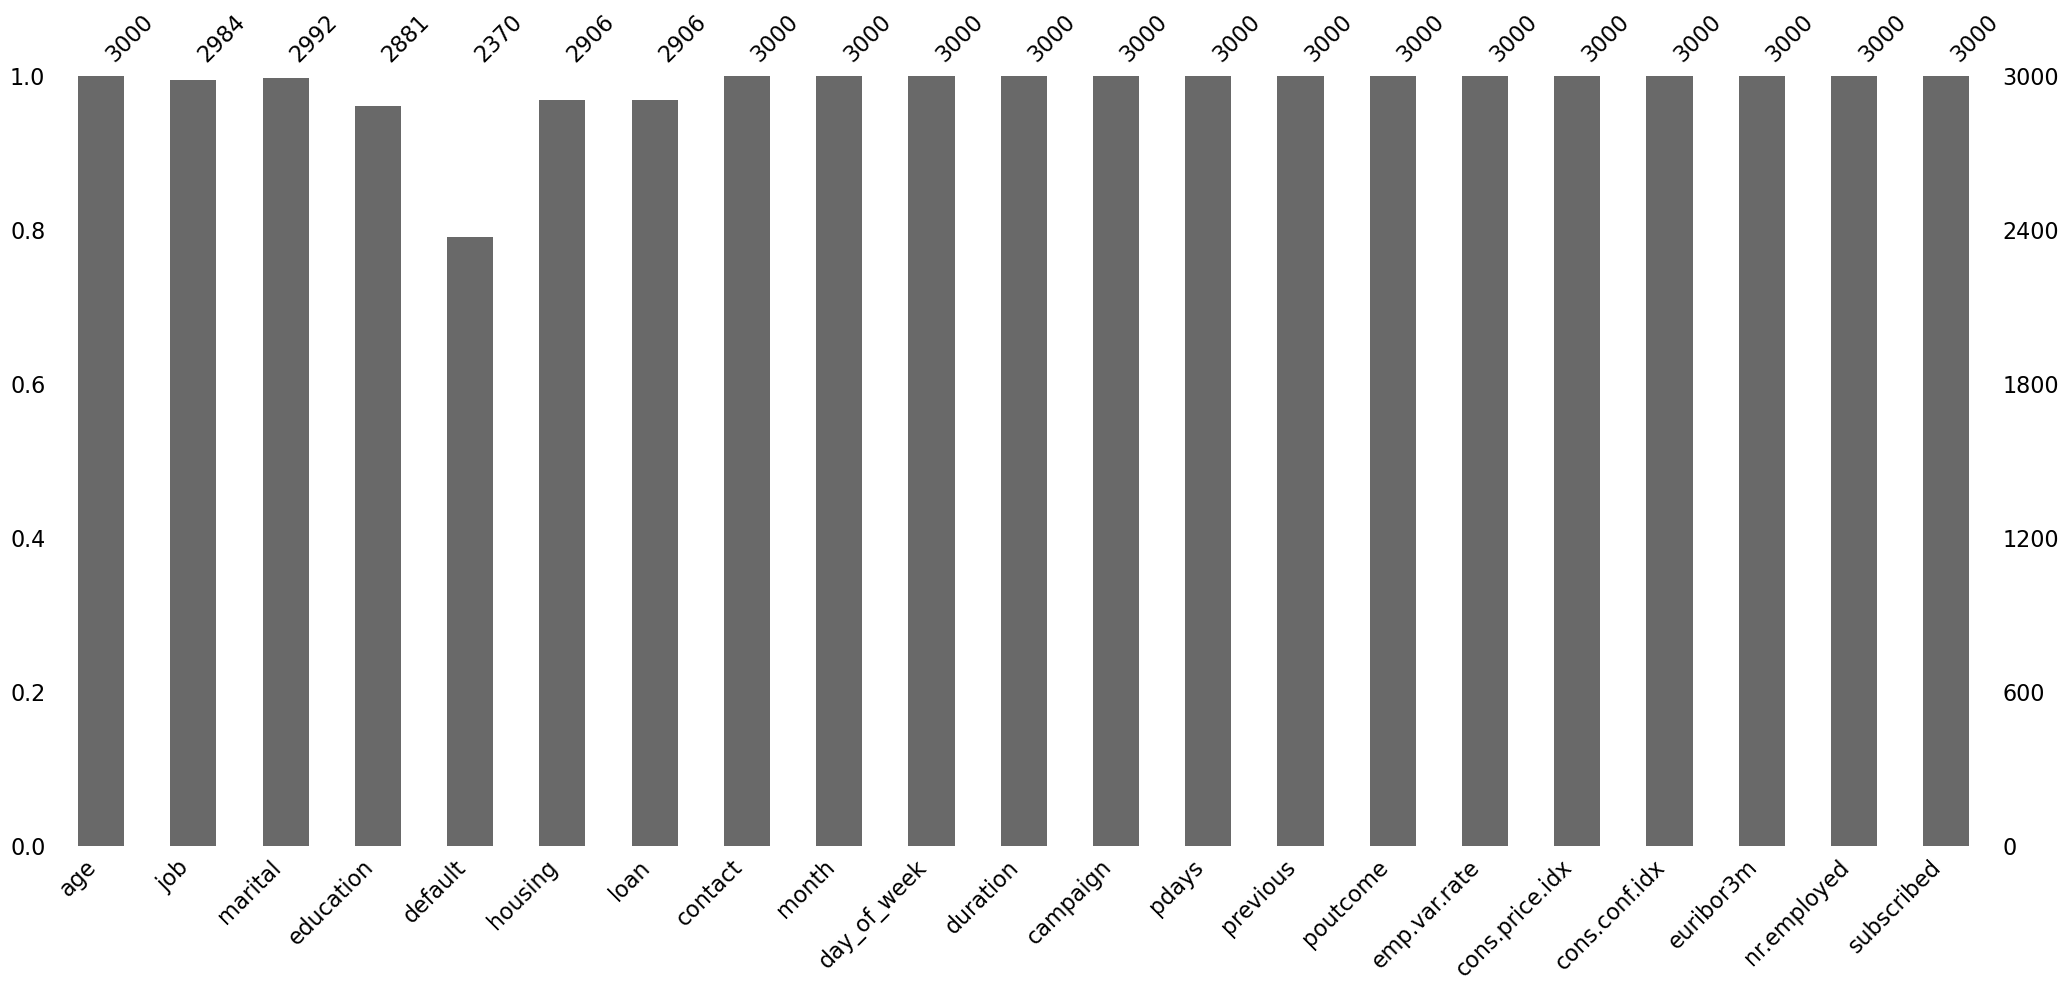

In [13]:
msno.bar(bankData)

In [14]:
bankData.shape

(3000, 21)

In [15]:
bankData.isnull().mean() * 100

age                0.000000
job                0.533333
marital            0.266667
education          3.966667
default           21.000000
housing            3.133333
loan               3.133333
contact            0.000000
month              0.000000
day_of_week        0.000000
duration           0.000000
campaign           0.000000
pdays              0.000000
previous           0.000000
poutcome           0.000000
emp.var.rate       0.000000
cons.price.idx     0.000000
cons.conf.idx      0.000000
euribor3m          0.000000
nr.employed        0.000000
subscribed         0.000000
dtype: float64

In [16]:
# dropping 'default' attribute as it has 20% of missing values
bankData.drop(['default'],axis=1, inplace=True)
categorical_attribute.remove('default')

In [17]:
bankData.shape

(3000, 20)

In [18]:
missing_categorical = ['job','marital','education','housing','loan']
print(bankData[missing_categorical])

              job   marital            education housing loan
0          admin.   married  professional.course      no   no
1      technician    single  professional.course     yes   no
2        services    single          high.school     yes   no
3          admin.   married          high.school     yes   no
4          admin.   married    university.degree     yes  yes
...           ...       ...                  ...     ...  ...
2995    housemaid  divorced  professional.course     yes   no
2996       admin.   married    university.degree      no   no
2997       admin.    single    university.degree     yes   no
2998       admin.   married    university.degree      no   no
2999  blue-collar   married  professional.course      no   no

[3000 rows x 5 columns]


In [19]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values= pd.NA , strategy='most_frequent')
bankData[missing_categorical] = imputer.fit_transform(bankData[missing_categorical])
bankData

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
0,59,admin.,married,professional.course,no,no,telephone,may,mon,139,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,24,technician,single,professional.course,yes,no,telephone,may,mon,380,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,25,services,single,high.school,yes,no,telephone,may,mon,222,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,37,admin.,married,high.school,yes,no,telephone,may,mon,172,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,57,admin.,married,university.degree,yes,yes,telephone,may,mon,616,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,67,housemaid,divorced,professional.course,yes,no,cellular,nov,mon,655,2,5,5,success,-1.1,94.767,-50.8,1.039,4963.6,yes
2996,33,admin.,married,university.degree,no,no,cellular,nov,tue,843,1,999,0,nonexistent,-1.1,94.767,-50.8,1.035,4963.6,yes
2997,31,admin.,single,university.degree,yes,no,cellular,nov,thu,353,1,999,0,nonexistent,-1.1,94.767,-50.8,1.031,4963.6,yes
2998,36,admin.,married,university.degree,no,no,cellular,nov,fri,254,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no


<AxesSubplot:>

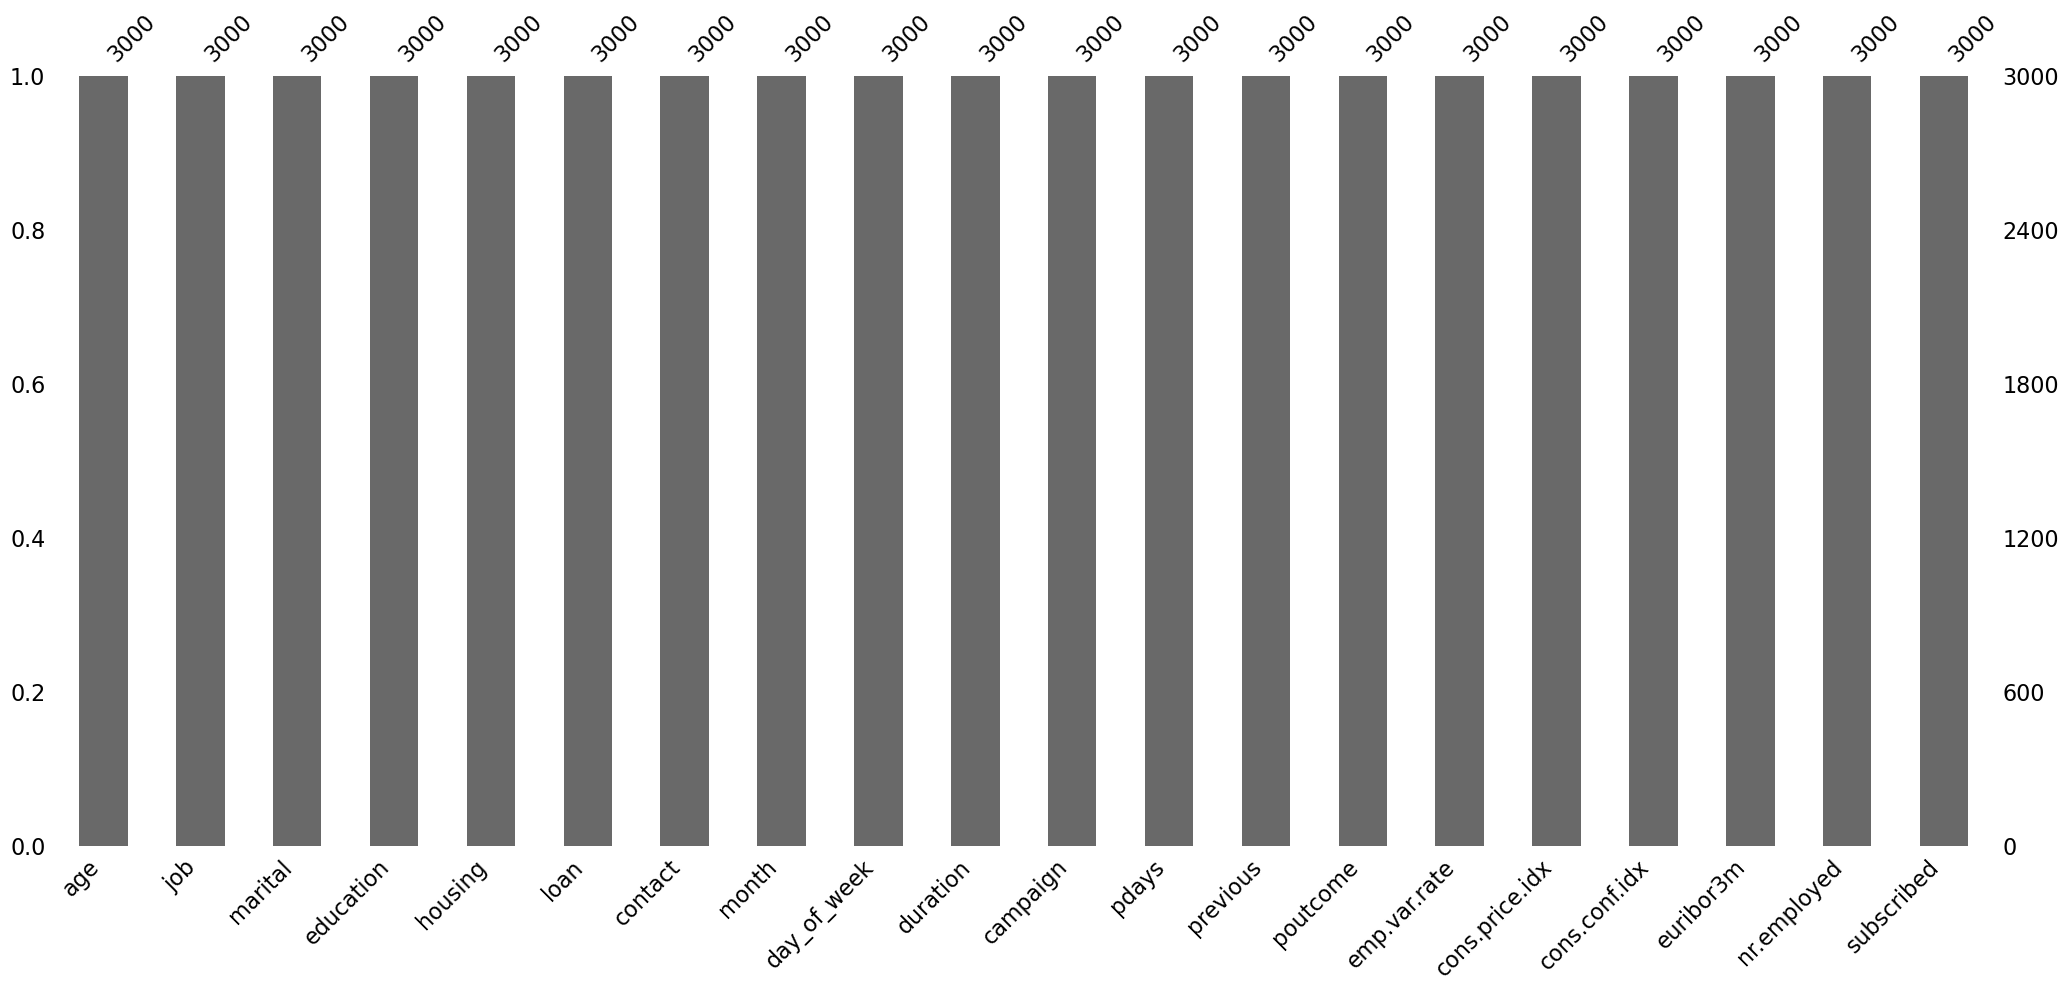

In [20]:
msno.bar(bankData)

# statistical summary

In [21]:
bankData.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.00000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,40.087000,264.914000,2.494000,964.902333,0.17300,0.049400,93.566945,-40.624467,3.599323,5166.548733
std,10.442914,270.948758,2.780025,180.865505,0.49378,1.576824,0.582401,4.650737,1.732934,70.549305
min,19.000000,3.000000,1.000000,0.000000,0.00000,-3.400000,92.201000,-50.800000,0.636000,4963.600000
25%,32.000000,102.000000,1.000000,999.000000,0.00000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.000000,183.000000,2.000000,999.000000,0.00000,1.100000,93.798000,-41.800000,4.857000,5191.000000
75%,47.000000,331.250000,3.000000,999.000000,0.00000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,88.000000,3785.000000,56.000000,999.000000,6.00000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [22]:
print(statistics.variance(bankData['age'])) # variance

109.05444914971658


C:\Users\alexa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



[Text(0.5, 0, '')]

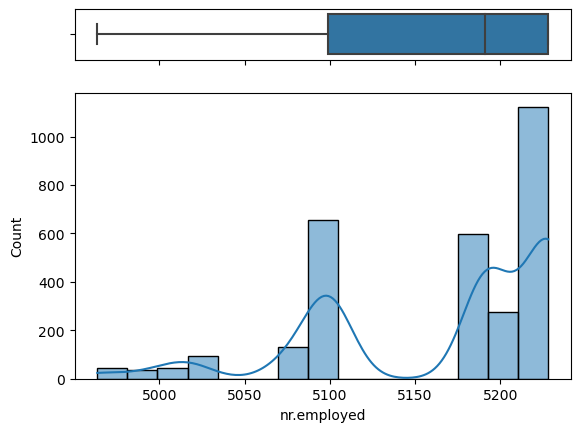

In [23]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
 
# Add a graph in each part
sns.boxplot(bankData["nr.employed"], ax=ax_box)
sns.histplot(bankData["nr.employed"], ax=ax_hist, kde=True)
 
# Remove x axis name for the boxplot
ax_box.set(xlabel='')

In [24]:
for i in bankData[numerical_attribute] :
    print(bankData[i].value_counts(),'\n')

36    159
32    144
33    140
31    139
30    124
     ... 
88      1
81      1
62      1
75      1
82      1
Name: age, Length: 64, dtype: int64 

139     18
77      18
85      17
87      17
125     16
        ..
1097     1
487      1
834      1
432      1
843      1
Name: duration, Length: 758, dtype: int64 

1     1321
2      776
3      387
4      179
5      114
6       71
7       35
8       26
9       15
10      14
11      12
12      12
13       8
23       5
15       5
17       4
16       3
14       2
18       2
20       2
22       1
33       1
56       1
25       1
24       1
27       1
31       1
Name: campaign, dtype: int64 

999    2897
3        30
6        30
9         8
4         6
13        5
2         4
5         3
0         3
11        3
8         3
10        2
15        2
1         1
7         1
14        1
21        1
Name: pdays, dtype: int64 

0    2588
1     333
2      62
3      10
4       4
5       2
6       1
Name: previous, dtype: int64 

 1.4    1123
-1.8     700


In [25]:
bankData[categorical_attribute].describe()

# the freq after all the missing values has been replaced by the modes

,job,marital,education,housing,loan,contact,month,day_of_week,poutcome,subscribed
count,3000,3000,3000,3000,3000,3000,3000,3000,3000,3000
unique,11,3,7,2,2,2,10,5,3,2
top,admin.,married,university.degree,yes,no,cellular,may,mon,nonexistent,no
freq,734,1828,964,1646,2576,1868,1048,669,2588,2642


In [26]:
for i in bankData[categorical_attribute] :
    print(bankData[i].value_counts(),'\n')

admin.           734
blue-collar      706
technician       497
services         303
management       224
retired          126
entrepreneur     101
self-employed     98
housemaid         85
unemployed        67
student           59
Name: job, dtype: int64 

married     1828
single       821
divorced     351
Name: marital, dtype: int64 

university.degree      964
high.school            665
basic.9y               472
professional.course    400
basic.4y               322
basic.6y               176
illiterate               1
Name: education, dtype: int64 

yes    1646
no     1354
Name: housing, dtype: int64 

no     2576
yes     424
Name: loan, dtype: int64 

cellular     1868
telephone    1132
Name: contact, dtype: int64 

may    1048
jul     530
aug     387
jun     373
nov     312
apr     210
oct      47
mar      39
sep      35
dec      19
Name: month, dtype: int64 

mon    669
thu    640
tue    599
wed    548
fri    544
Name: day_of_week, dtype: int64 

nonexistent    2588
failure      

<AxesSubplot:xlabel='education', ylabel='Density'>

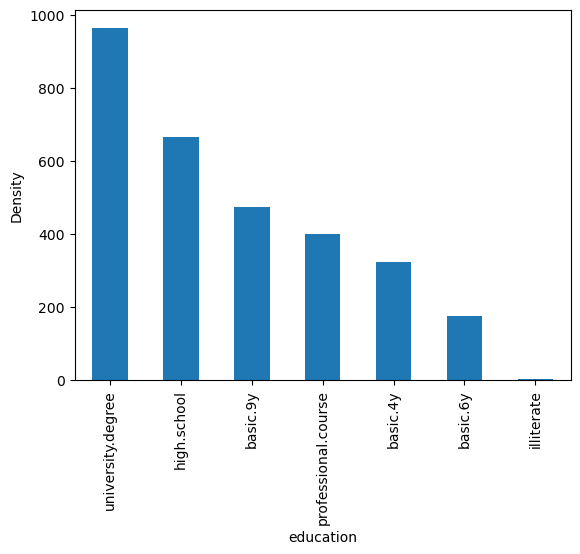

In [27]:
bankData['education'].value_counts().plot(kind='bar', xlabel='education', ylabel='Density')

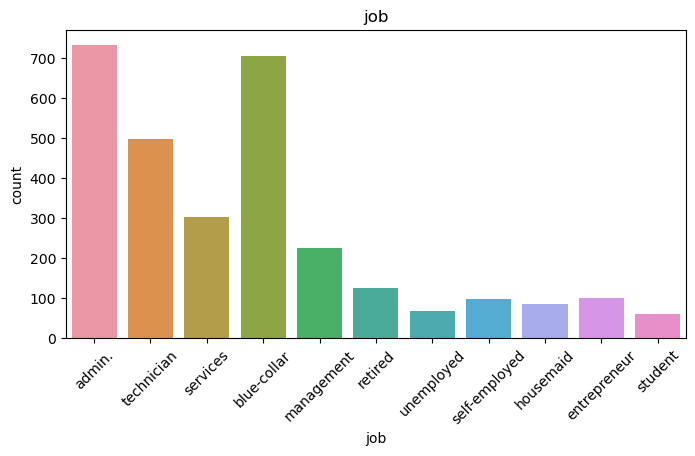

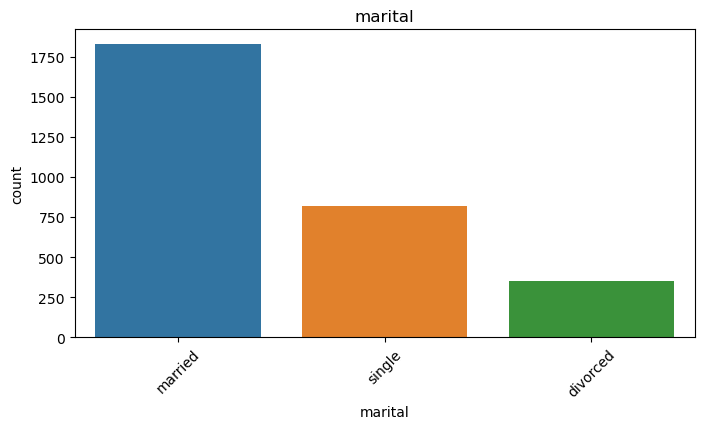

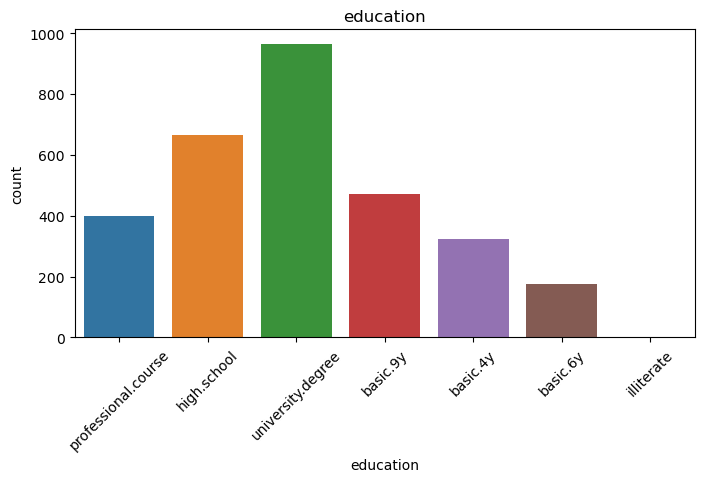

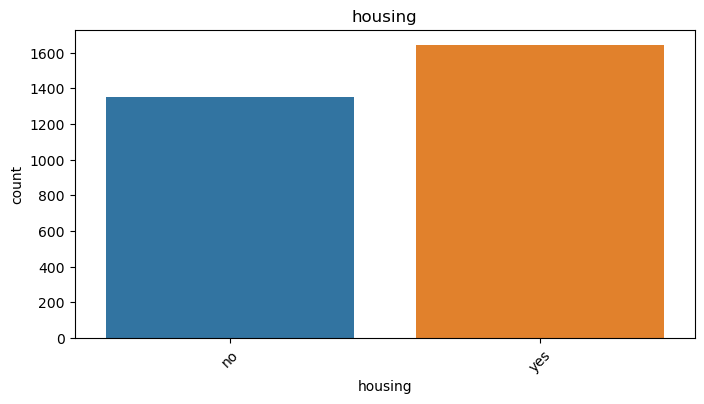

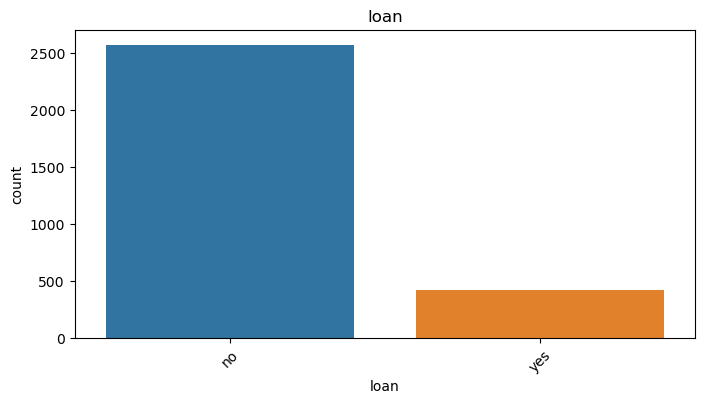

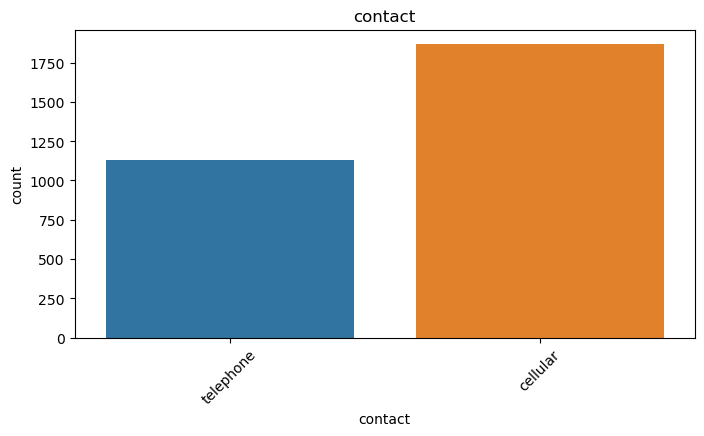

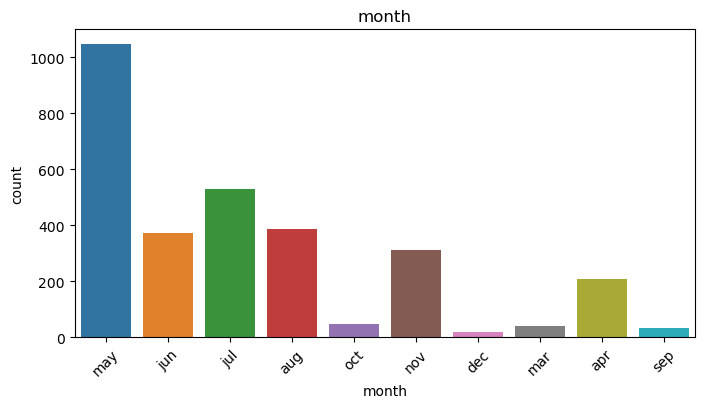

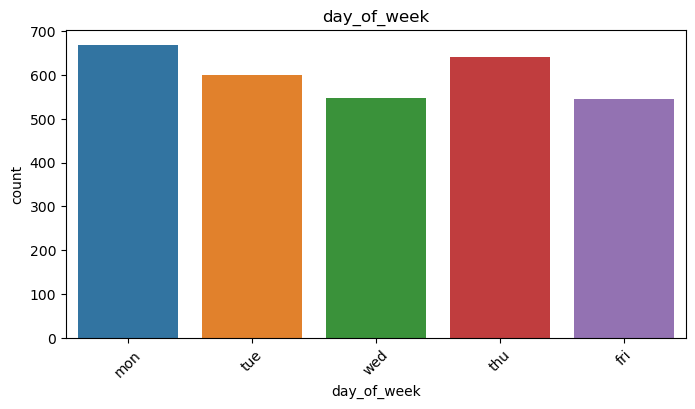

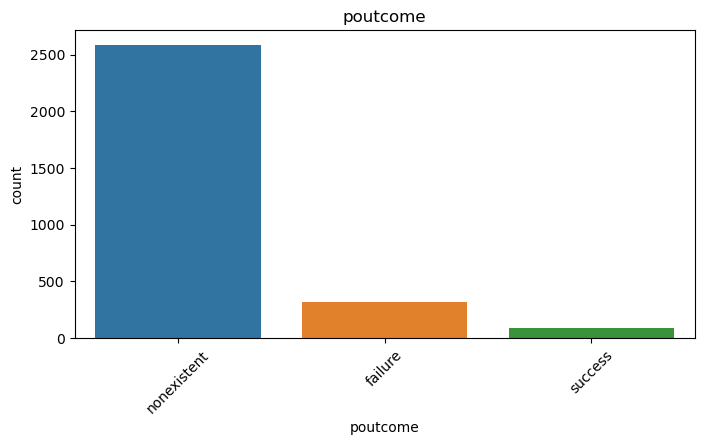

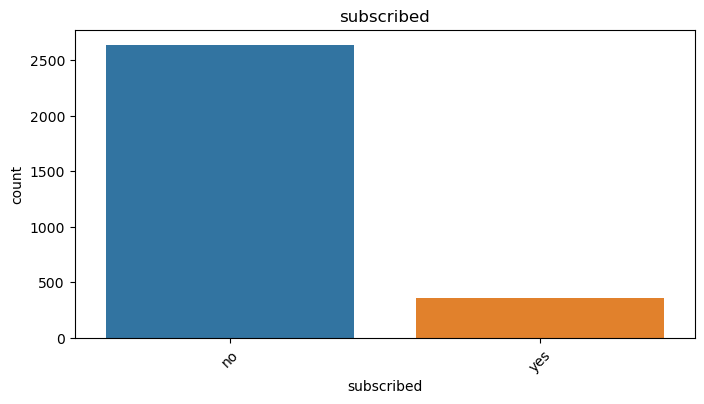

In [28]:
for col in categorical_attribute:
    plt.figure(figsize=(8,4))
    sns.countplot(x=bankData[col], data=bankData)
    plt.title(col)
    plt.xticks(rotation=45)
    plt.show()

<AxesSubplot:title={'center':'education'}, ylabel='Frequency'>

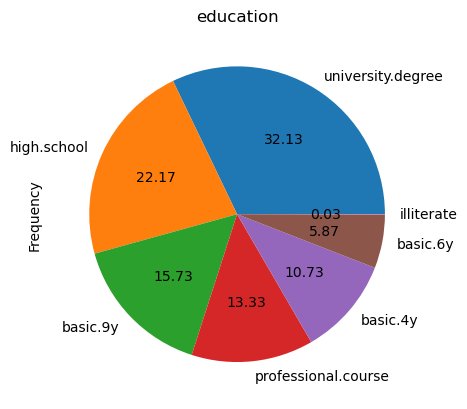

In [29]:
bankData['education'].value_counts().plot(kind='pie', autopct="%.2f", title='education',ylabel='Frequency')

<AxesSubplot:title={'center':'marital'}, ylabel='Frequency'>

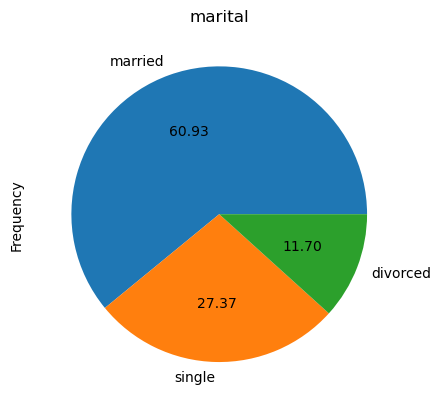

In [30]:
bankData['marital'].value_counts().plot(kind='pie', autopct="%.2f", title='marital',ylabel='Frequency')

<AxesSubplot:title={'center':'subscribed'}, ylabel='Frequency'>

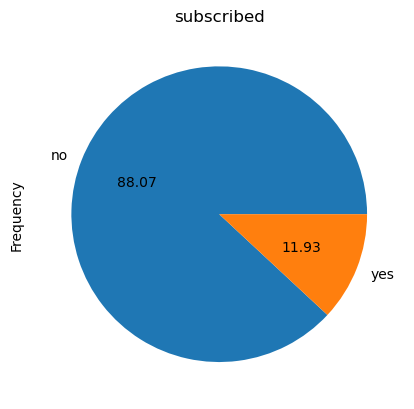

In [31]:
bankData['subscribed'].value_counts().plot(kind='pie', autopct="%.2f", title='subscribed',ylabel='Frequency')

In [32]:
for i in bankData[categorical_attribute] :
    print(i,": " , bankData[i].unique(), "\n")

job :  ['admin.' 'technician' 'services' 'blue-collar' 'management' 'retired'
 'unemployed' 'self-employed' 'housemaid' 'entrepreneur' 'student'] 

marital :  ['married' 'single' 'divorced'] 

education :  ['professional.course' 'high.school' 'university.degree' 'basic.9y'
 'basic.4y' 'basic.6y' 'illiterate'] 

housing :  ['no' 'yes'] 

loan :  ['no' 'yes'] 

contact :  ['telephone' 'cellular'] 

month :  ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep'] 

day_of_week :  ['mon' 'tue' 'wed' 'thu' 'fri'] 

poutcome :  ['nonexistent' 'failure' 'success'] 

subscribed :  ['no' 'yes'] 



# Data Exploration

In [33]:
# encoding target variable to numerical
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
bankData['subscribed'] = le.fit_transform(bankData['subscribed'])
bankData

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
0,59,admin.,married,professional.course,no,no,telephone,may,mon,139,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,24,technician,single,professional.course,yes,no,telephone,may,mon,380,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,25,services,single,high.school,yes,no,telephone,may,mon,222,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,37,admin.,married,high.school,yes,no,telephone,may,mon,172,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,57,admin.,married,university.degree,yes,yes,telephone,may,mon,616,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,67,housemaid,divorced,professional.course,yes,no,cellular,nov,mon,655,2,5,5,success,-1.1,94.767,-50.8,1.039,4963.6,1
2996,33,admin.,married,university.degree,no,no,cellular,nov,tue,843,1,999,0,nonexistent,-1.1,94.767,-50.8,1.035,4963.6,1
2997,31,admin.,single,university.degree,yes,no,cellular,nov,thu,353,1,999,0,nonexistent,-1.1,94.767,-50.8,1.031,4963.6,1
2998,36,admin.,married,university.degree,no,no,cellular,nov,fri,254,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0


In [34]:
bankData['subscribed'].describe()

count    3000.000000
mean        0.119333
std         0.324234
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: subscribed, dtype: float64

In [35]:
pivotTable = pd.pivot_table(bankData, values='subscribed', index='job',
                    columns='education',aggfunc= 'sum')
pivotTable

education,basic.4y,basic.6y,basic.9y,high.school,illiterate,professional.course,university.degree
job,,,,,,,
admin.,0.0,1.0,3.0,32.0,NaN,6.0,64.0
blue-collar,9.0,5.0,22.0,11.0,0.0,5.0,6.0
entrepreneur,0.0,0.0,1.0,1.0,NaN,1.0,3.0
housemaid,1.0,0.0,0.0,2.0,NaN,5.0,2.0
management,0.0,2.0,2.0,1.0,NaN,0.0,22.0
retired,18.0,1.0,1.0,6.0,NaN,7.0,4.0
self-employed,0.0,0.0,1.0,0.0,NaN,1.0,6.0
services,1.0,1.0,3.0,18.0,NaN,0.0,5.0
student,1.0,NaN,2.0,7.0,NaN,3.0,2.0


In [36]:
bankData_subset = bankData[(bankData['education'] == 'illiterate')]
bankData_subset

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
1320,54,blue-collar,married,illiterate,yes,yes,cellular,jul,tue,83,1,999,0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,0


In [37]:
bank_corr = bankData.corr()
bank_corr

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
age,1.000000,-0.023925,0.027509,-0.024313,0.024433,0.019863,0.009533,0.124071,0.027759,0.003813,0.027461
duration,-0.023925,1.000000,-0.038726,-0.037932,0.010766,-0.025665,0.031115,-0.007036,-0.031204,-0.053167,0.361520
campaign,0.027509,-0.038726,1.000000,0.055244,-0.086083,0.163199,0.131986,0.015354,0.148421,0.153096,-0.059873
pdays,-0.024313,-0.037932,0.055244,1.000000,-0.605066,0.256998,0.079985,-0.081591,0.281881,0.357443,-0.320106
previous,0.024433,0.010766,-0.086083,-0.605066,1.000000,-0.413972,-0.236399,-0.059532,-0.434916,-0.470453,0.237567
emp.var.rate,0.019863,-0.025665,0.163199,0.256998,-0.413972,1.000000,0.802060,0.202984,0.973117,0.911857,-0.321069
cons.price.idx,0.009533,0.031115,0.131986,0.079985,-0.236399,0.802060,1.000000,0.077779,0.722276,0.567200,-0.159945
cons.conf.idx,0.124071,-0.007036,0.015354,-0.081591,-0.059532,0.202984,0.077779,1.000000,0.290430,0.111192,0.073914
euribor3m,0.027759,-0.031204,0.148421,0.281881,-0.434916,0.973117,0.722276,0.290430,1.000000,0.945603,-0.324517
nr.employed,0.003813,-0.053167,0.153096,0.357443,-0.470453,0.911857,0.567200,0.111192,0.945603,1.000000,-0.376761


<AxesSubplot:>

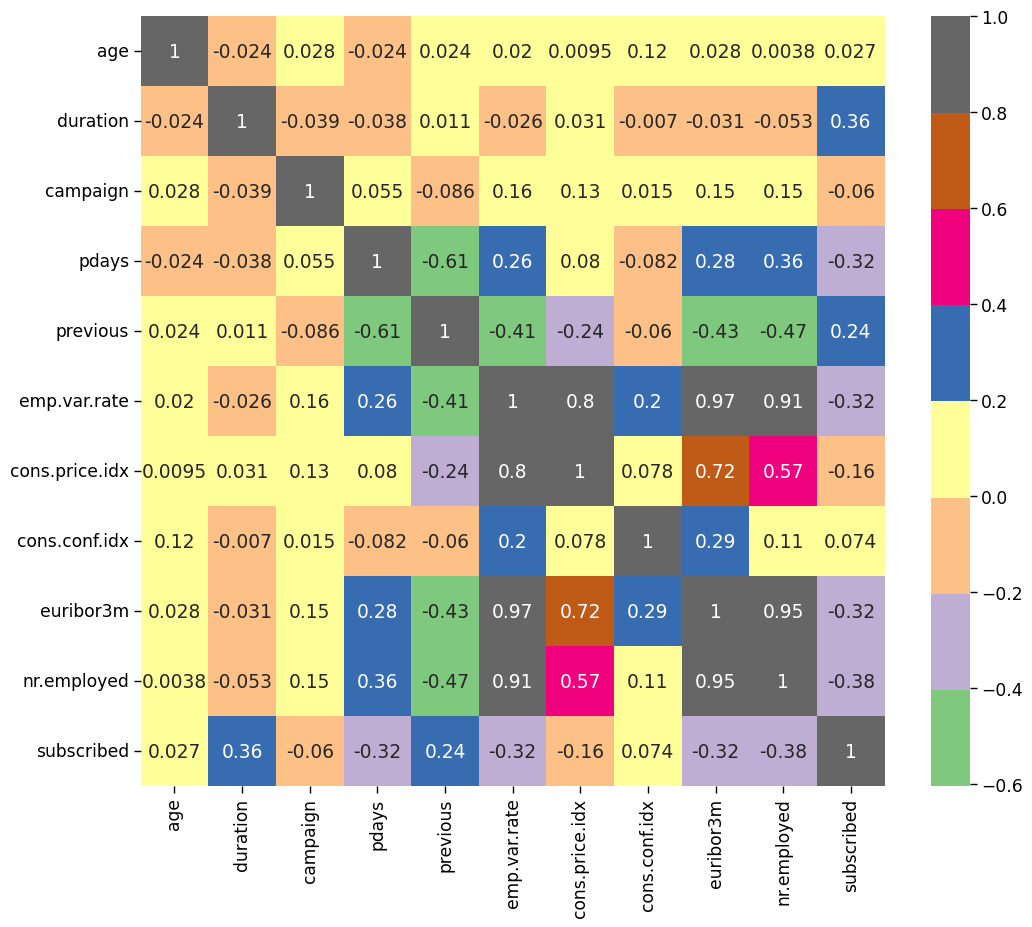

In [38]:
plt.figure(figsize=(12,10))
sns.set_context('paper', font_scale=1.4)

# Create the heatmap, add annotations and a color map
sns.heatmap(bank_corr, annot=True, cmap='Accent')

In [39]:
bank_corr['subscribed'].sort_values(ascending=True)

nr.employed      -0.376761
euribor3m        -0.324517
emp.var.rate     -0.321069
pdays            -0.320106
cons.price.idx   -0.159945
campaign         -0.059873
age               0.027461
cons.conf.idx     0.073914
previous          0.237567
duration          0.361520
subscribed        1.000000
Name: subscribed, dtype: float64

# Data preprocessing

               age     duration     campaign        pdays     previous  \
count  3000.000000  3000.000000  3000.000000  3000.000000  3000.000000   
mean      0.305609     0.069253     0.027164     0.965868     0.028833   
std       0.151347     0.071642     0.050546     0.181047     0.082297   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.188406     0.026177     0.000000     1.000000     0.000000   
50%       0.275362     0.047594     0.018182     1.000000     0.000000   
75%       0.405797     0.086793     0.036364     1.000000     0.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx    euribor3m  nr.employed  
count   3000.000000     3000.000000    3000.000000  3000.000000  3000.000000  
mean       0.718625        0.532325       0.425755     0.672108     0.767292  
std        0.328505        0.226969       0.194592     0.393045     0.266727  
min        0.0000

<AxesSubplot:>

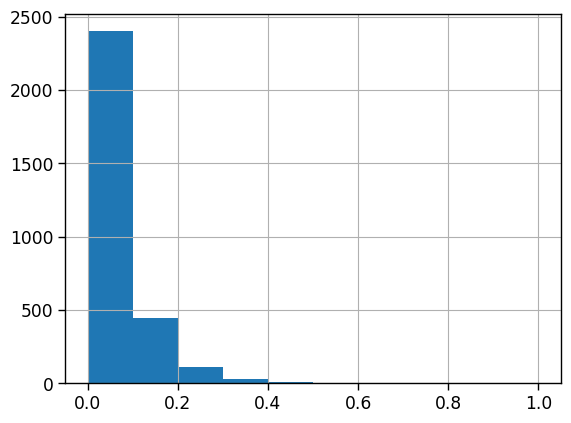

In [40]:
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot

min_max = MinMaxScaler(feature_range=(0,1))
data1 = min_max.fit_transform(bankData[numerical_attribute])

dataset1 = pd.DataFrame(data1, columns=numerical_attribute)
# summarize
print(dataset1.describe())

# histograms of the variables
dataset1['duration'].hist()

In [41]:
duration_subset = dataset1[(dataset1['duration'] == 0)]
duration_subset

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
392,0.26087,0.0,0.036364,1.0,0.0,0.9375,0.698753,0.60251,0.95736,0.859735


C:\Users\alexa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



[Text(0.5, 0, '')]

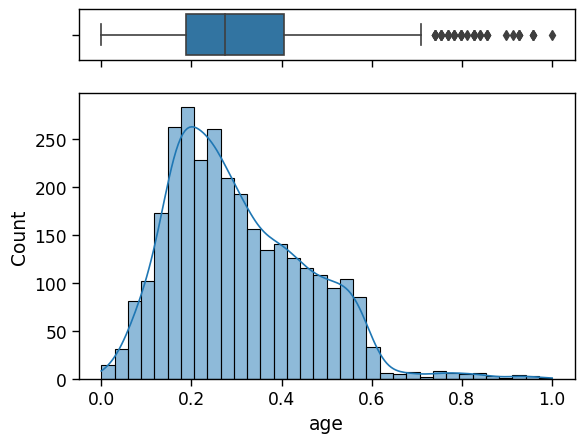

In [42]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
 
# Add a graph in each part
sns.boxplot(dataset1["age"], ax=ax_box)
sns.histplot(dataset1["age"], ax=ax_hist, kde=True)
 
# Remove x axis name for the boxplot
ax_box.set(xlabel='')

                age      duration      campaign         pdays      previous  \
count  3.000000e+03  3.000000e+03  3.000000e+03  3.000000e+03  3.000000e+03   
mean  -3.895403e-16 -2.048361e-16  1.411464e-16 -7.118584e-15  6.329270e-15   
std    1.000167e+00  1.000167e+00  1.000167e+00  1.000167e+00  1.000167e+00   
min   -2.019601e+00 -9.668163e-01 -5.374948e-01 -5.335806e+00 -3.504167e-01   
25%   -7.745298e-01 -6.013726e-01 -5.374948e-01  1.885564e-01 -3.504167e-01   
50%   -1.998818e-01 -3.023732e-01 -1.777259e-01  1.885564e-01 -3.504167e-01   
75%    6.620903e-01  2.448694e-01  1.820431e-01  1.885564e-01 -3.504167e-01   
max    4.588852e+00  1.299387e+01  1.924980e+01  1.885564e-01  1.180276e+01   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
count  3.000000e+03    3.000000e+03   3.000000e+03  3.000000e+03  3.000000e+03  
mean  -1.579026e-14   -1.391953e-14   1.507535e-15 -3.426296e-15  1.133819e-14  
std    1.000167e+00    1.000167e+00   1.00016

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'duration'}>,
        <AxesSubplot:title={'center':'campaign'}>],
       [<AxesSubplot:title={'center':'pdays'}>,
        <AxesSubplot:title={'center':'previous'}>,
        <AxesSubplot:title={'center':'emp.var.rate'}>],
       [<AxesSubplot:title={'center':'cons.price.idx'}>,
        <AxesSubplot:title={'center':'cons.conf.idx'}>,
        <AxesSubplot:title={'center':'euribor3m'}>],
       [<AxesSubplot:title={'center':'nr.employed'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

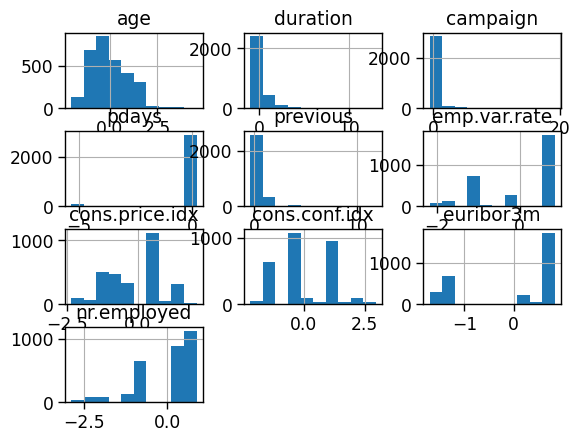

In [43]:
# Standard scaler is the same as Z-score normalization

from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot
std_scaler = StandardScaler()
data2 = std_scaler.fit_transform(bankData[numerical_attribute])

# convert the array back to a dataframe
dataset2 = pd.DataFrame(data2,columns=numerical_attribute)

# summarize
print(dataset2.describe())

# histograms of the variables
dataset2.hist()

In [44]:
bankData['age-category'] = pd.cut(x=bankData['age'], bins=[0,35,55,88], labels=['adult', 'middle-age', 'old-age'])

middle-age    1542
adult         1178
old-age        280
Name: age-category, dtype: int64

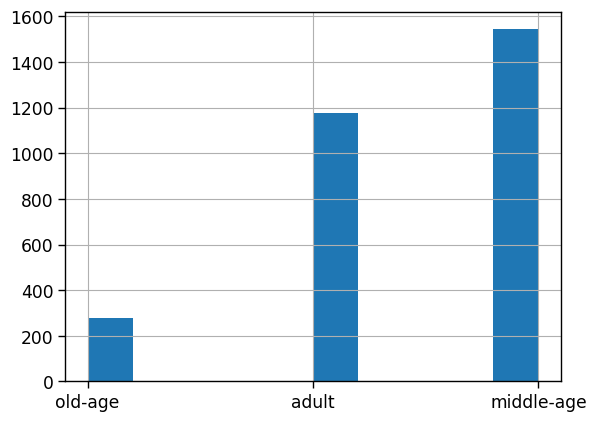

In [45]:
bankData['age-category'].hist()
bankData['age-category'].value_counts()

In [46]:
BD_marital = pd.get_dummies(bankData, columns = ['marital'])

BD_marital

,age,job,education,housing,loan,contact,month,day_of_week,duration,campaign,...,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed,age-category,marital_divorced,marital_married,marital_single
0,59,admin.,professional.course,no,no,telephone,may,mon,139,1,...,1.1,93.994,-36.4,4.857,5191.0,0,old-age,0,1,0
1,24,technician,professional.course,yes,no,telephone,may,mon,380,1,...,1.1,93.994,-36.4,4.857,5191.0,0,adult,0,0,1
2,25,services,high.school,yes,no,telephone,may,mon,222,1,...,1.1,93.994,-36.4,4.857,5191.0,0,adult,0,0,1
3,37,admin.,high.school,yes,no,telephone,may,mon,172,1,...,1.1,93.994,-36.4,4.857,5191.0,0,middle-age,0,1,0
4,57,admin.,university.degree,yes,yes,telephone,may,mon,616,1,...,1.1,93.994,-36.4,4.857,5191.0,0,old-age,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,67,housemaid,professional.course,yes,no,cellular,nov,mon,655,2,...,-1.1,94.767,-50.8,1.039,4963.6,1,old-age,1,0,0
2996,33,admin.,university.degree,no,no,cellular,nov,tue,843,1,...,-1.1,94.767,-50.8,1.035,4963.6,1,adult,0,1,0
2997,31,admin.,university.degree,yes,no,cellular,nov,thu,353,1,...,-1.1,94.767,-50.8,1.031,4963.6,1,adult,0,0,1
2998,36,admin.,university.degree,no,no,cellular,nov,fri,254,2,...,-1.1,94.767,-50.8,1.028,4963.6,0,middle-age,0,1,0


In [47]:
bankData

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed,age-category
0,59,admin.,married,professional.course,no,no,telephone,may,mon,139,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,old-age
1,24,technician,single,professional.course,yes,no,telephone,may,mon,380,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,adult
2,25,services,single,high.school,yes,no,telephone,may,mon,222,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,adult
3,37,admin.,married,high.school,yes,no,telephone,may,mon,172,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,middle-age
4,57,admin.,married,university.degree,yes,yes,telephone,may,mon,616,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,old-age
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,67,housemaid,divorced,professional.course,yes,no,cellular,nov,mon,655,...,5,5,success,-1.1,94.767,-50.8,1.039,4963.6,1,old-age
2996,33,admin.,married,university.degree,no,no,cellular,nov,tue,843,...,999,0,nonexistent,-1.1,94.767,-50.8,1.035,4963.6,1,adult
2997,31,admin.,single,university.degree,yes,no,cellular,nov,thu,353,...,999,0,nonexistent,-1.1,94.767,-50.8,1.031,4963.6,1,adult
2998,36,admin.,married,university.degree,no,no,cellular,nov,fri,254,...,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0,middle-age


In [48]:
numerical_attribute

['age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed']

# Plot

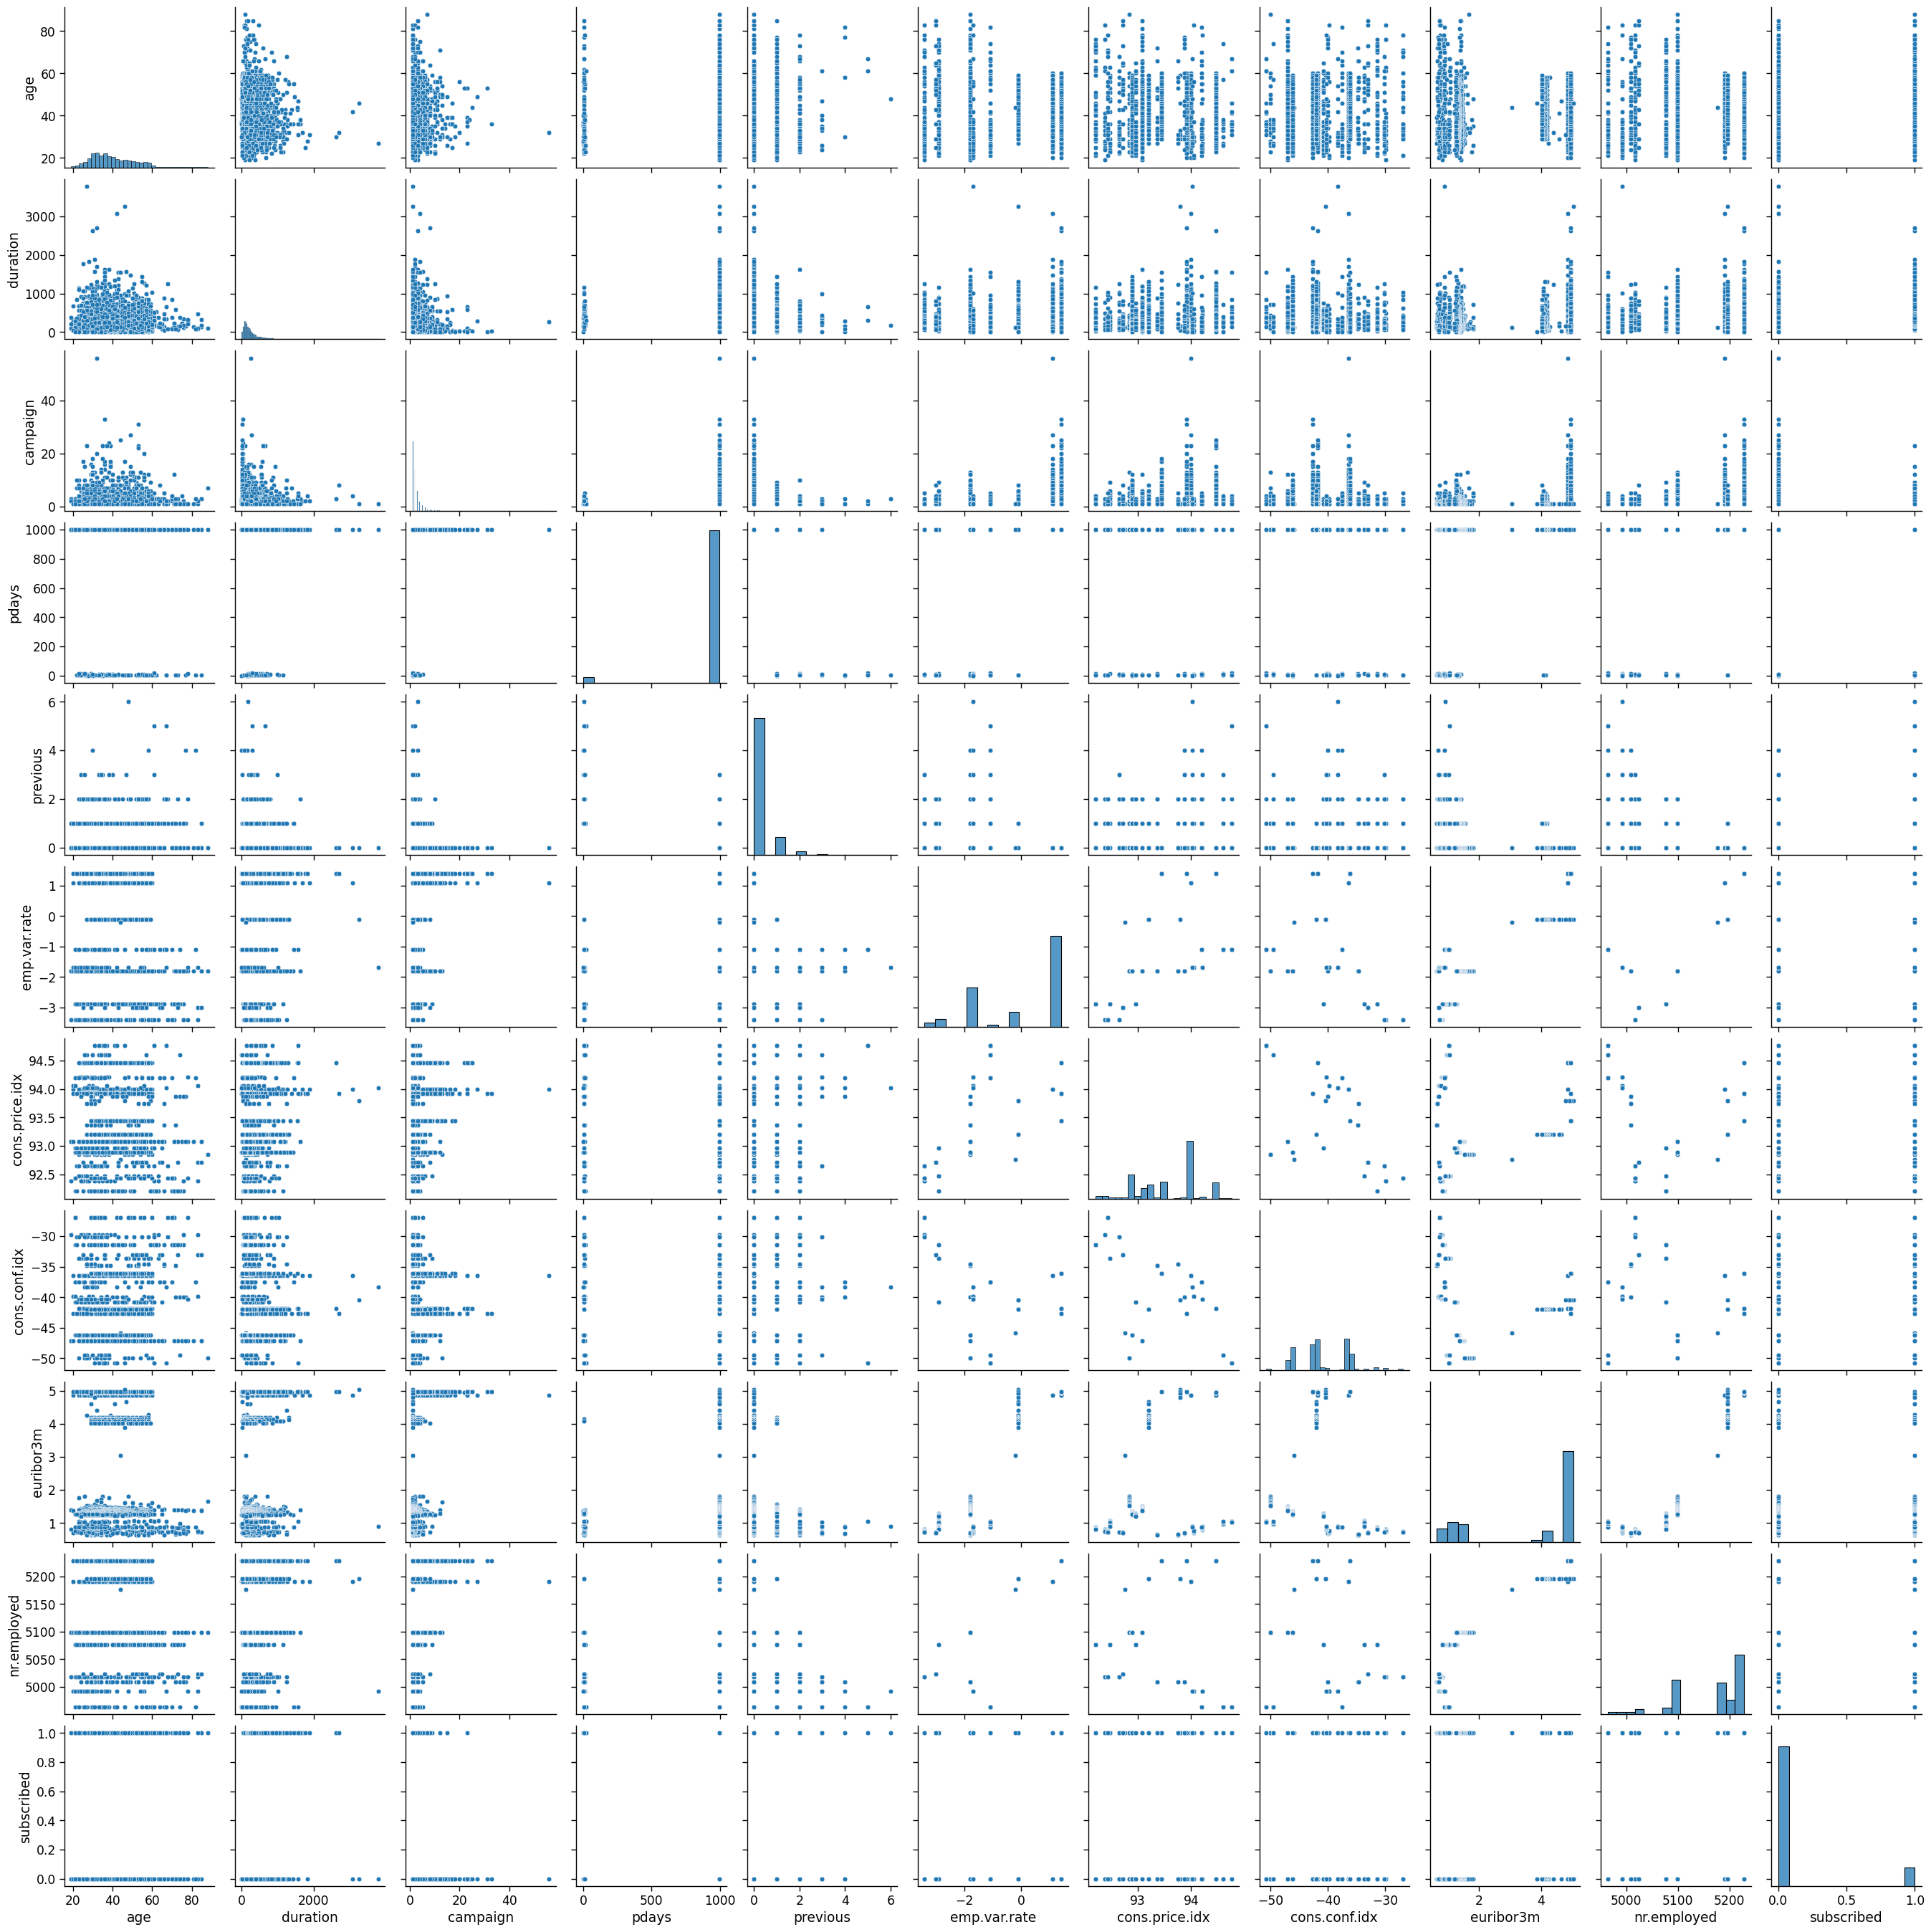

In [49]:
sns.pairplot(bankData)

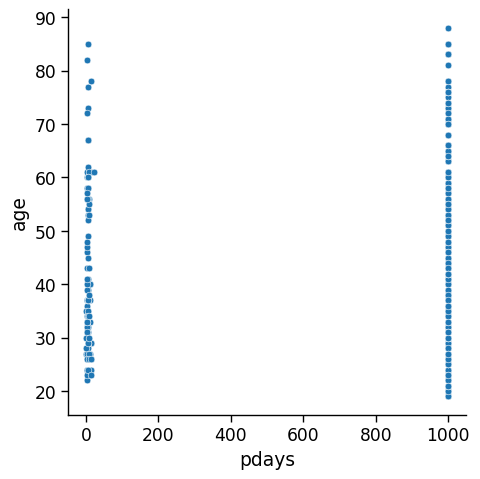

In [50]:
sns.relplot(x="pdays", y="age", data=bankData);

In [51]:
dataset1 = dataset1.join(bankData['subscribed'])

In [52]:
dataset1

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
0,0.579710,0.035960,0.000000,1.000000,0.000000,0.937500,0.698753,0.60251,0.957360,0.859735,0
1,0.072464,0.099683,0.000000,1.000000,0.000000,0.937500,0.698753,0.60251,0.957360,0.859735,0
2,0.086957,0.057906,0.000000,1.000000,0.000000,0.937500,0.698753,0.60251,0.957360,0.859735,0
3,0.260870,0.044685,0.000000,1.000000,0.000000,0.937500,0.698753,0.60251,0.957360,0.859735,0
4,0.550725,0.162084,0.000000,1.000000,0.000000,0.937500,0.698753,0.60251,0.957360,0.859735,0
...,...,...,...,...,...,...,...,...,...,...,...
2995,0.695652,0.172396,0.018182,0.005005,0.833333,0.479167,1.000000,0.00000,0.091404,0.000000,1
2996,0.202899,0.222105,0.000000,1.000000,0.000000,0.479167,1.000000,0.00000,0.090497,0.000000,1
2997,0.173913,0.092544,0.000000,1.000000,0.000000,0.479167,1.000000,0.00000,0.089589,0.000000,1
2998,0.246377,0.066367,0.018182,1.000000,0.000000,0.479167,1.000000,0.00000,0.088909,0.000000,0


In [53]:
#model = AgglomerativeClustering(n_clusters=3)
#pred = model.fit_predict(bankData[numerical_attribute])

clust = KMeans(n_clusters=3)
clust.fit(bankData[numerical_attribute])

KMeans(n_clusters=3)

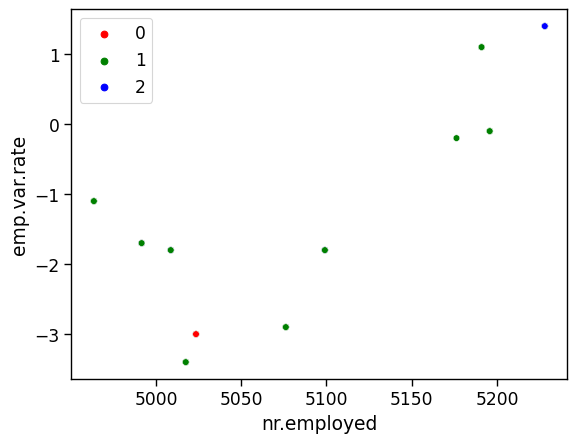

In [54]:
sns.scatterplot(x=bankData["nr.employed"], y=bankData["emp.var.rate"],
                 hue=clust.labels_, palette =['red','green','blue']);

In [55]:
model = AgglomerativeClustering(n_clusters=3)
model.fit(bankData[numerical_attribute])

AgglomerativeClustering(n_clusters=3)

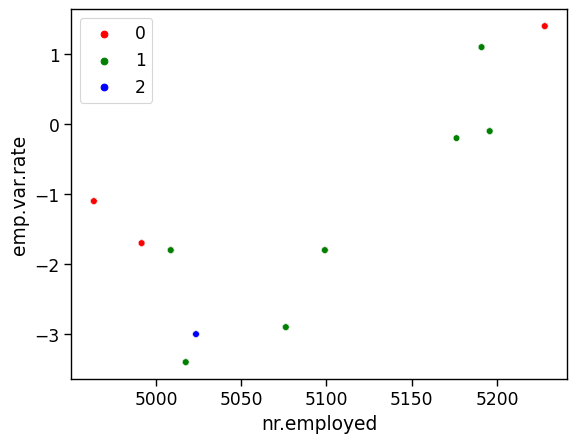

In [56]:
sns.scatterplot(x=bankData["nr.employed"], y=bankData["emp.var.rate"],
                 hue=model.labels_, palette= ['red', 'green', 'blue']);